# **Assignment: Feature Engineering**



1.   Create a Logistic Regression using the titanic dataset.
2.   Start by making a model that only uses numerical features and predicts the "survived" column.
3. Make different models utilizing the feature engineering techniques learned in class.
4. Compare your results between validation and test cost functions and report the percent difference between them.

In [421]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [422]:
titanic = sns.load_dataset('titanic')

In [423]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


To see where we are missing data!

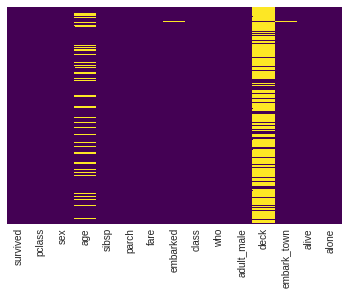

In [424]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

To see how many survived!

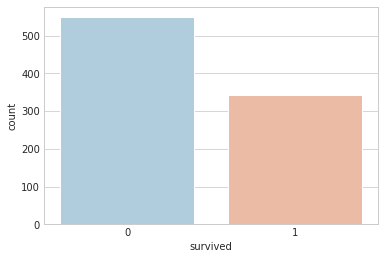

In [425]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=titanic,palette='RdBu_r')

To see how many survived and sex if male or female!

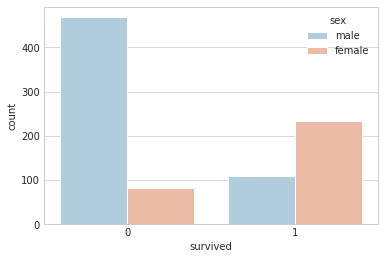

In [426]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='sex',data=titanic,palette='RdBu_r')

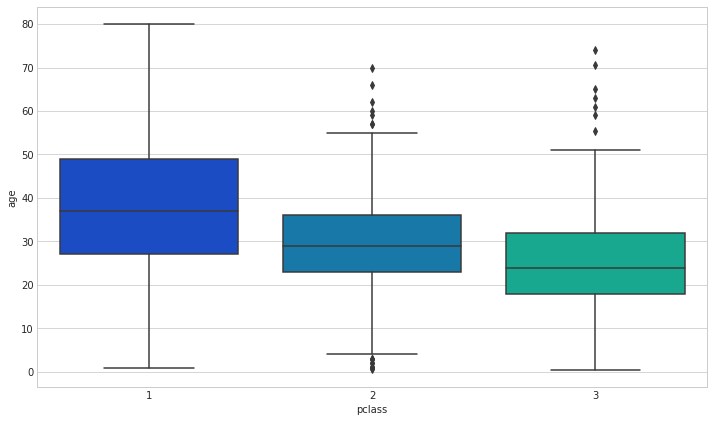

In [427]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='pclass',y='age',data=titanic,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older. We'll use these average age values to impute based on Pclass for Age.

In [428]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [429]:
titanic['age'] = titanic[['age','pclass']].apply(impute_age,axis=1)

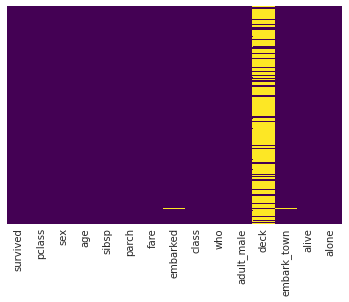

In [430]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

and drop the deck column and the row in embarked and embark_town that is NaN.

In [431]:
titanic.drop('deck',axis=1,inplace=True)

In [432]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [433]:
titanic.dropna(inplace=True)

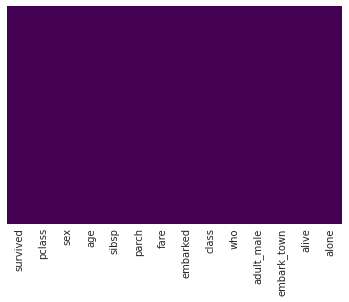

In [434]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# **Building a Logistic Regression model**
only uses numerical features and predicts the "survived" column.

In [435]:
# Split Data
train, test = train_test_split(
    titanic, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [436]:
titanic.shape

(889, 14)

In [437]:
# train_set 

train.shape

(568, 14)

In [438]:
# validation_set 
val.shape

(143, 14)

In [439]:
# test_set 

test.shape

(178, 14)

In [440]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,Cherbourg,yes,True
723,0,2,male,50.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
473,1,2,female,23.0,0,0,13.7917,C,Second,woman,False,Cherbourg,yes,True
515,0,1,male,47.0,0,0,34.0208,S,First,man,True,Southampton,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [441]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568 entries, 875 to 132
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     568 non-null    int64   
 1   pclass       568 non-null    int64   
 2   sex          568 non-null    object  
 3   age          568 non-null    float64 
 4   sibsp        568 non-null    int64   
 5   parch        568 non-null    int64   
 6   fare         568 non-null    float64 
 7   embarked     568 non-null    object  
 8   class        568 non-null    category
 9   who          568 non-null    object  
 10  adult_male   568 non-null    bool    
 11  embark_town  568 non-null    object  
 12  alive        568 non-null    object  
 13  alone        568 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 55.0+ KB


In [442]:
# Model with only numeric features
train.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [443]:
# This is used to return only numeric columns 
(titanic.dtypes != "category").values & (titanic.dtypes != "object").values 

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False,  True, False, False,  True])

In [444]:
def cleaner(titanic):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (titanic.dtypes != "category").values & (titanic.dtypes != "object").values 

    # Return only numeric columns
    titanic = titanic.iloc[:, columns_bool].dropna()

    return titanic

# applying the function on both the training and validation sets
train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [445]:
# Create X, y train and validation sets

target = "survived"

# feature set --> everything except for survived --> X_train
# target set/column --> survived --> y_train

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]


In [446]:
X_train.head()

,pclass,age,sibsp,parch,fare,adult_male,alone
875,3,15.0,0,0,7.2250,False,True
723,2,50.0,0,0,13.0000,True,True
473,2,23.0,0,0,13.7917,False,True
515,1,47.0,0,0,34.0208,True,True
9,2,14.0,1,0,30.0708,False,False


In [447]:
lo1 = LogisticRegression() # Create the model

# Training step
lo1.fit(X_train, y_train) # Fit the model

# Testing step
lo1.score(X_val, y_val) # Score the model

0.8181818181818182

In [448]:
# The model has 7 coeffecients because we have 7 columns in the training set
lo1.coef_

array([[-1.22406149e+00, -4.16025011e-02, -7.41501753e-01,
        -4.78423932e-01,  2.45943104e-03, -2.98898888e+00,
        -5.47891180e-01]])

In [449]:
# Look at classification report
# store predictions
preds = lo1.predict(X_val)

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87        92
           1       0.80      0.65      0.72        51

    accuracy                           0.82       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.82      0.82      0.81       143



In [450]:
# Total observations in validation set
len(y_val)

143

In [451]:
# Total False observation in validation set
len(y_val[y_val == False])

92

In [452]:
# Total True observation in validation set
len(y_val[y_val == True])

51

In [453]:
# predicting resutls from the model
# This should give us the if survived by 1 and not survived by 0 
np.round(lo1.predict([[3, 15.0, 0, 0	,7.2250	,False,True]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

# **Cross Validation**

In [454]:
# Look at the cross val score
# Perform 5 fold cross validation on the data
scores = cross_val_score(lo1, X_val, y_val, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [455]:
# Find the mean score of our model
# Our models score on validation is around 79% accurate
scores.mean()

0.7955665024630543

In [456]:
# Calculates the cost functions
def calc_cost(y_val, preds):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_val, preds)
    mae = mean_absolute_error(y_val, preds)
    rmse = mean_squared_error(y_val, preds, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

print("\nLogistic Regression")
res1 = calc_cost(y_train, lo1.predict(X_train))


Logistic Regression
MSE: 0.1742957746478873
MAE: 0.1742957746478873
RMSE: 0.4174874544796374


In [457]:
lo1 = calc_cost(y_val, lo1.predict(X_val))

MSE: 0.18181818181818182
MAE: 0.18181818181818182
RMSE: 0.4264014327112209


# **Building a Logistic Regression model**

using feature engineering techniques 

# **One-Hot Encoder**

In [458]:
train.describe(exclude=["number","bool"])

,sex,embarked,class,who,embark_town,alive
count,568,568,568,568,568,568
unique,2,3,3,3,3,2
top,male,S,Third,man,Southampton,no
freq,367,407,322,337,407,348


In [459]:
# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["sex", "embarked","embark_town","alive"]

# One Hot encode the column in both the train and validation sets
one_hot_titanic = one_hot.fit_transform(train[col_names]).toarray()

one_hot_titanic_val = one_hot.transform(val[col_names]).toarray()

In [460]:
# Look at the categories
one_hot.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [461]:
one_hot_titanic

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [462]:
one_hot.categories_[0]

array(['female', 'male'], dtype=object)

In [463]:
one_hot.categories_[1]

array(['C', 'Q', 'S'], dtype=object)

In [464]:
one_hot.categories_[2]

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

In [465]:
one_hot.categories_[3]

array(['no', 'yes'], dtype=object)

In [466]:
col_names

['sex', 'embarked', 'embark_town', 'alive']

In [467]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'alive_no',
 'alive_yes']

In [468]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["sex", "embarked","embark_town","alive"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [469]:
one_hot_titanic.shape

(568, 10)

In [470]:
one_hot_titanic

array([[1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.]])

In [471]:
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,Cherbourg,yes,True
723,0,2,male,50.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
473,1,2,female,23.0,0,0,13.7917,C,Second,woman,False,Cherbourg,yes,True
515,0,1,male,47.0,0,0,34.0208,S,First,man,True,Southampton,no,True
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [472]:
# Cast One Hot Encoded values into a dataframe

oh_titanic = pd.DataFrame(
    one_hot_titanic,
    index=train.index,
    columns = column_names
)

oh_titanic_val = pd.DataFrame(
    one_hot_titanic_val,
    index=val.index,
    columns = column_names
)

print(oh_titanic.shape)
print(oh_titanic_val.shape)

(568, 10)
(143, 10)


In [473]:
oh_titanic.head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
723,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
473,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
515,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [474]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = train.merge(oh_titanic, on=train.index).set_index("key_0").drop(["sex", "embarked","embark_town","alive"], axis=1)
val_new = val.merge(oh_titanic_val, on=val.index).set_index("key_0").drop(["sex", "embarked","embark_town","alive"], axis=1)

print(train_new.shape)
print(val_new.shape)

(568, 20)
(143, 20)


In [475]:
train_new

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
key_0,,,,,,,,,,,,,,,,,,,,
875,1,3,15.0,0,0,7.2250,Third,child,False,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
723,0,2,50.0,0,0,13.0000,Second,man,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
473,1,2,23.0,0,0,13.7917,Second,woman,False,True,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
515,0,1,47.0,0,0,34.0208,First,man,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
9,1,2,14.0,1,0,30.0708,Second,child,False,False,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,3,22.0,0,0,9.0000,Third,man,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
165,1,3,9.0,0,2,20.5250,Third,child,False,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
118,0,1,24.0,0,1,247.5208,First,man,True,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# **Ordinal Encoder**

In [476]:
ordinal = OrdinalEncoder()

col_names = ["class","who"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_val = ordinal.transform(val[col_names])

In [477]:
# Look at categories
ordinal.categories_

[array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object)]

In [478]:
# Add oridnally encoded column to the data
train_new["class"]= ordinal_ls
val_new["class"] = ordinal_ls_val
train_new["who"]= ordinal_ls
val_new["who"] = ordinal_ls_val

train_new.sample(5)

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
key_0,,,,,,,,,,,,,,,,,,,,
313,0,3,28.0,0,0,7.8958,2.0,2.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
800,0,2,34.0,0,0,13.0000,1.0,1.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
470,0,3,24.0,0,0,7.2500,2.0,2.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
809,1,1,33.0,1,0,53.1000,0.0,0.0,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
221,0,2,27.0,0,0,13.0000,1.0,1.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [479]:
train_new["class"].value_counts()

2.0    322
0.0    136
1.0    110
Name: class, dtype: int64

In [480]:
train_new["who"].value_counts()

2.0    322
0.0    136
1.0    110
Name: who, dtype: int64

In [481]:
# Creating the feature set and the traget set for both the training and the validation 

target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [482]:
lo2 = LogisticRegression()

lo2.fit(X_train, y_train)
lo2.score(X_val, y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.0

In [483]:
reslo2 = calc_cost(y_val, lo2.predict(X_val))

MSE: 0.0
MAE: 0.0
RMSE: 0.0


In [484]:
X_val

,pclass,age,sibsp,parch,fare,class,who,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alive_no,alive_yes
key_0,,,,,,,,,,,,,,,,,,,
872,1,33.0,0,0,5.0000,0.0,0.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
438,1,64.0,1,4,263.0000,0.0,0.0,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
592,3,47.0,0,0,7.2500,2.0,2.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
238,2,19.0,0,0,10.5000,1.0,1.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
453,1,49.0,1,0,89.1042,0.0,0.0,True,False,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,3,2.0,4,1,39.6875,2.0,2.0,False,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
102,1,21.0,0,1,77.2875,0.0,0.0,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
494,3,21.0,0,0,8.0500,2.0,2.0,True,True,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [485]:
delta_mse = ((res1['MSE']- reslo2['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- reslo2['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- reslo2['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")

MSE % decrease: 100
MAE % decrease: 100
RMSE % decrease: 100


# The result and the cost when using feature engineering techniques is make a huge difference in the accuracy 
# with = 100% 
# without = 79%

# **Saving and Loading model in Joblib**

In [486]:
# Used for saving out models
import joblib
import seaborn as sns
import datetime

In [487]:
datetime.datetime.today()

datetime.datetime(2022, 10, 18, 5, 37, 44, 588987)

In [488]:
str(datetime.datetime.today())

'2022-10-18 05:37:48.554977'

In [489]:
# Only to extract the date
str(datetime.datetime.today())[:10]

'2022-10-18'

In [491]:
fn1="LogisticRegression1"
fn2="one_hot"
fn3="ordinal"
fn4="LogisticRegression2"


In [492]:
# Save the model as todays date

# Todays date as string
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(lo1, fn1 )
joblib.dump(one_hot,fn2)
joblib.dump(ordinal,fn3)
joblib.dump(lo2,fn4 )

['LogisticRegression2']

In [493]:
# Load the model
jl_LogisticRegression1 = joblib.load(fn1)
jl_one_hot = joblib.load(fn2)
jl_ordinal = joblib.load(fn3)
jl_LogisticRegression2 = joblib.load(fn4)

In [494]:
# Column names for one hot and ordinal encoder
col_names_one_hot = ["sex", "embarked","embark_town","alive"]
col_names_ordinal =  ["class","who"]

# Change column order to make addition of scaled features easier
col_order_ls = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'adult_male', 'alone', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alive_no', 'alive_yes']

def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df


def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names =["sex", "embarked","embark_town","alive"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict